In [1]:
OUTPUT_FOLDER = '/mnt/data/processed/'

import glob
patient_ids = glob.glob(OUTPUT_FOLDER + 'original_resolution/*.npy')
patient_ids = [ x.replace(OUTPUT_FOLDER + 'original_resolution/', '').replace('.npy', '') for x in patient_ids ]


In [14]:
from pylab import *
%matplotlib inline

In [50]:
import random
import numpy as np

vsize = np.array([16,32,32])

def get_volume(image, segmented_image, vsize, min_overlap = 0.2):
    while True:
        pos = np.asarray([ np.random.randint(k, image.shape[k] - vsize[k]) for k in range(3) ])
        print(pos)
        volume = image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]]
        segmented_volume = segmented_image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]]
        overlap = np.mean(segmented_volume)
        print(overlap)
        # check if it is within or partly within lung
        # if entirely outside lung, try again
        if overlap >= min_overlap:
            break
    return volume, segmented_volume, overlap

    
def generator():
    while True:
        # open random image
        pid = random.choice(patient_ids)
        image = np.load(OUTPUT_FOLDER + 'original_resolution/' + pid + '.npy')
        segmented_image = np.load(OUTPUT_FOLDER + 'segmented_lungs/' + pid + '.npy')
        # grab random volume
        pos = np.asarray([ np.random.randint(k, image.shape[k] - vsize[k]) for k in range(3) ])
        print(pos)
        overlap = np.mean(segmented_image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]])
        print(overlap)
        # check if it is within or partly within lung
        # if entirely outside lung, try again
        if overlap < 0.2:
            continue
        if overlap < 1:
            label = 0
        else:
            label = 1
        return image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]]

# cube = generator()
# for n in range(16):
#     imshow(cube[n,:,:], vmin=-1000, vmax=1000, cmap='gray')
#     show()

In [ ]:
volume = np.zeros((32,32,32))
mask = np.zeros((32,32,32), dtype=np.int)
mask[8:8+16,8:8+16,8:8+16] = 1
central_density = np.mean(volume[mask]) - np.mean(volume[1 - mask])

In [24]:
pid = patient_ids[429]
image = np.load(OUTPUT_FOLDER + 'original_resolution/' + pid + '.npy')
segmented_image = np.load(OUTPUT_FOLDER + 'segmented_lungs/' + pid + '.npy')
pid

'00cba091fa4ad62cc3200a657aeb957e'

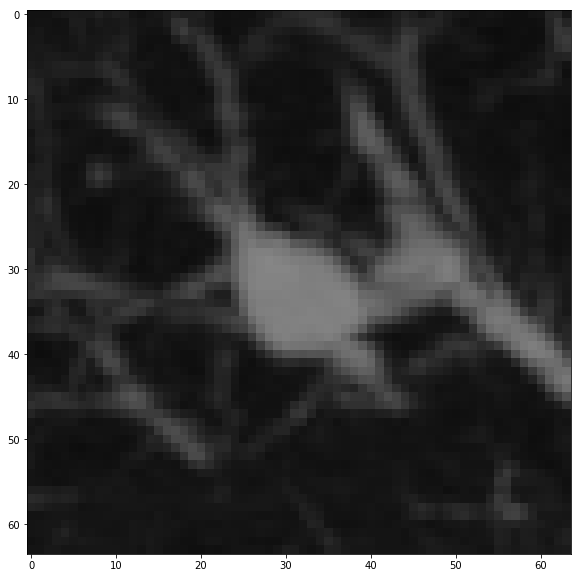

In [34]:
figure(figsize=(10,10))
mip = np.amax(image[67-4:67+4], axis=0)
imshow(mip[185-32:185+32, 110-32:110+32], vmin=-1000, vmax=1000, cmap='gray')

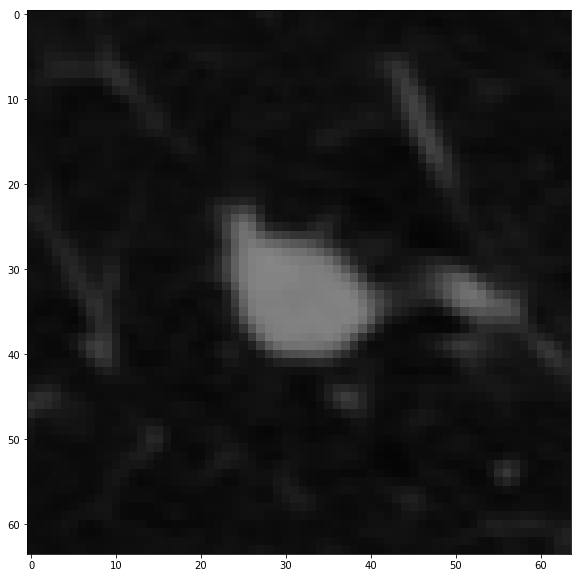

In [36]:
figure(figsize=(10,10))
imshow(image[67, 185-32:185+32, 110-32:110+32], vmin=-1000, vmax=1000, cmap='gray')

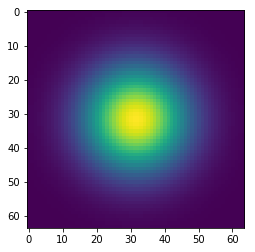

In [71]:
from scipy import signal
vsize = (32,64,64)
mask = signal.gaussian(vsize[1], std=vsize[1]/6)[:,None] * signal.gaussian(vsize[2], std=vsize[2]/6)[None,:]
imshow(mask)

In [75]:
volume, segmented_volume, overlap = get_volume(image, segmented_image, (32,64,64), min_overlap = 0.8)
# density = np.mean(volume[])

[ 26 401  64]
0.0
[ 28 357 293]
0.0329055786133
[  7 337 149]
0.0662994384766
[ 31 229 187]
0.760345458984
[ 48 136  43]
0.691268920898
[ 85 377  10]
0.0
[ 33  92 221]
0.013298034668
[100 152 338]
0.464660644531
[ 48 313  14]
0.0927505493164
[ 82 269 146]
1.0


In [47]:
nodule = image[67-16:67+16, 185-32:185+32, 110-32:110+32]
nodule.shape

(32, 64, 64)

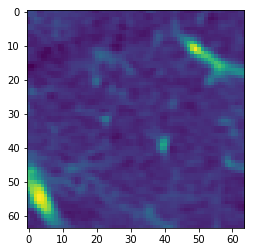

In [52]:
imshow(volume[16,:,:])

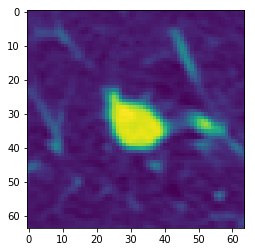

In [53]:
imshow(nodule[16,:,:])

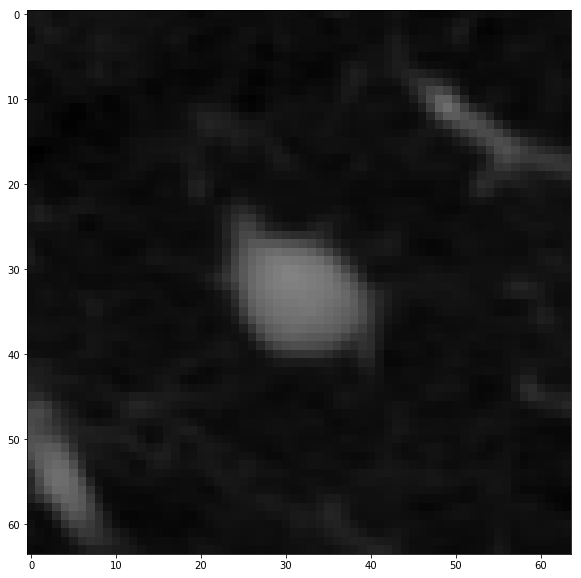

In [57]:
figure(figsize=(10,10))
imshow(volume[16] * (1-mask) + nodule[16] * mask, vmin=-1000, vmax=1000, cmap='gray')

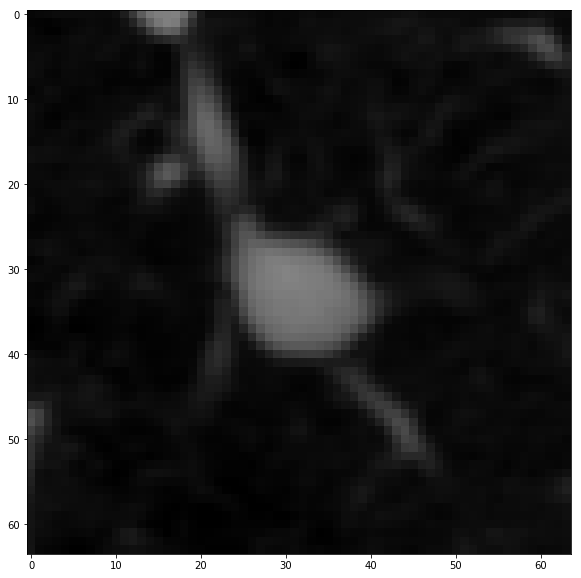

In [76]:
x = np.amax( np.dstack(((volume[16]+1000) * (1-mask), (nodule[16]+1000) * mask)), axis=2 ) - 1000

figure(figsize=(10,10))
imshow(x, vmin=-1000, vmax=1000, cmap='gray')

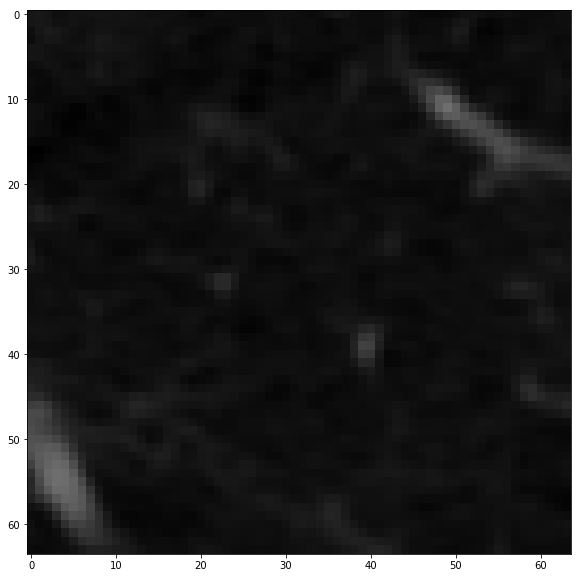

In [69]:
figure(figsize=(10,10))
imshow(volume[16], vmin=-1000, vmax=1000, cmap='gray')

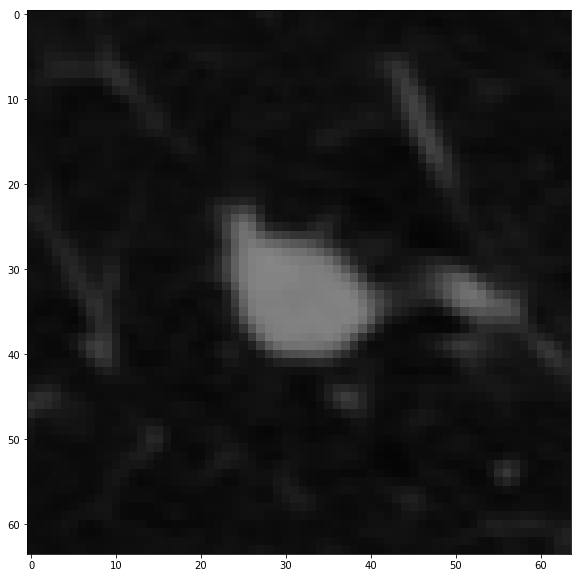

In [70]:
figure(figsize=(10,10))
imshow(nodule[16], vmin=-1000, vmax=1000, cmap='gray')

In [93]:
mask2 = make_mask(sigma=3)

for n in range(100):
    volume2, _, _ = get_volume(image, segmented_image, (32,64,64), min_overlap = 0.8)
    density = np.mean((volume2[16]+1000) * mask) / np.mean(mask) - 1000
    print(density)
    if density > -700:
        break

[ 59 219  20]
0.607040405273
[ 44 373 200]
0.0
[ 89 234   2]
0.0716781616211
[ 63 274 211]
0.178855895996
[ 88 251 222]
0.4287109375
[ 14 368 210]
0.0
[ 47 367 317]
0.0103073120117
[ 56 257  60]
0.996368408203
-810.686857763
[ 49 307  94]
0.930770874023
-848.789006006
[ 18 330 433]
0.00259399414062
[ 96 265 285]
0.92106628418
-863.654965374
[ 19  24 181]
0.0
[ 30 111 199]
0.0529251098633
[ 10 385 220]
0.0
[  2 326 181]
0.0212860107422
[ 72 416 423]
0.0
[ 33  14 373]
0.0
[ 94 124   8]
3.81469726562e-05
[ 13 359 377]
0.00286865234375
[ 37  90 211]
0.0639572143555
[ 46  41 280]
0.0052490234375
[ 86 192  22]
0.297966003418
[100 258 270]
0.747222900391
[  2 169 215]
0.0467147827148
[ 10 388 154]
0.0
[  3 374 267]
0.0
[ 18  91 150]
0.162826538086
[ 44 265 119]
0.996238708496
-853.834643501
[ 77 133 155]
0.892036437988
-839.907928237
[ 53 125  44]
0.545066833496
[ 43  32 120]
0.0
[ 87 268 159]
0.986640930176
-875.986633378
[ 99 319 316]
0.45044708252
[ 58 382 117]
0.0
[ 58 387 395]
0.0
[ 39  

In [82]:
from scipy import signal
def make_mask(vsize = (32,64,64), sigma=10):
    mask = signal.gaussian(vsize[1], std=sigma)[:,None] * signal.gaussian(vsize[2], std=sigma)[None,:]
    return mask

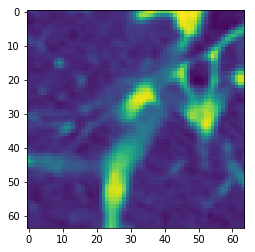

In [94]:
imshow(volume2[16])

In [91]:
def compose_amax(volume, nodule, mask):
    x = np.amax( np.dstack(((volume[16]+1000) * (1-mask), (nodule[16]+1000) * mask)), axis=2 ) - 1000
    return x

def compose_amax2(volume, nodule, mask):
    x = np.amax( np.dstack(((volume[16]+1000), (nodule[16]+1000) * mask)), axis=2 ) - 1000
    return x

def compose_mean(volume, nodule, mask):
    x = volume[16] * (1-mask) + nodule[16] * mask
    return x


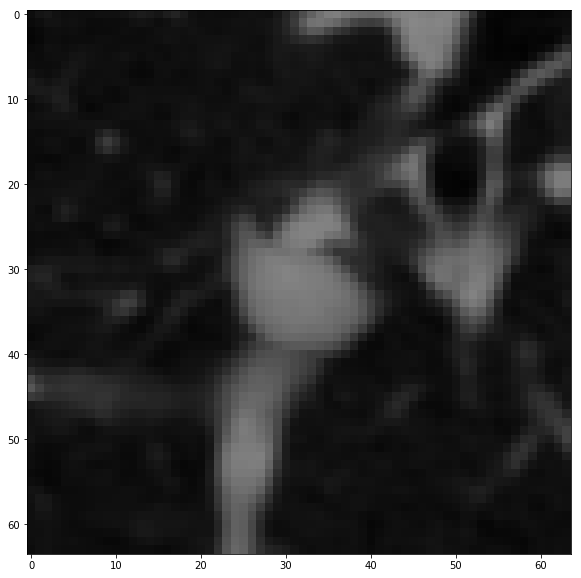

In [95]:
figure(figsize=(10,10))
imshow(compose_amax2(volume2, nodule, mask), vmin=-1000, vmax=1000, cmap='gray')